In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, TensorDataset
from torch import optim
import torchvision
import torch.nn as nn
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from mlxtend.data import loadlocal_mnist
import os
import numpy as np
import random
import cv2
from sklearn.model_selection import KFold
from torchvision import transforms

In [2]:
transform = transforms.Compose([
                #transforms.ToPILImage(),
                #transforms.Grayscale(),
                transforms.Resize((256, 256)),
                transforms.RandomHorizontalFlip(p=0.5),
                transforms.RandomRotation(degrees=45),
                transforms.ToTensor(),
            ])

In [3]:
dataset_o = datasets.ImageFolder('cs510chips', transform =  torchvision.transforms.Compose([transforms.Resize((256, 256)), torchvision.transforms.ToTensor()])
)
dataset_aug = datasets.ImageFolder('cs510chips', transform = transform)
dataset = torch.utils.data.ConcatDataset([dataset_o, dataset_aug])
dataset_dl = DataLoader(dataset, batch_size=100, shuffle=True, num_workers=1)
for (data, labels) in dataset_dl:
    print (labels)

tensor([1, 6, 6, 3, 1, 5, 7, 0, 1, 6, 6, 2, 6, 7, 3, 3, 4, 4, 2, 6, 4, 3, 2, 2,
        3, 2, 5, 2, 4, 3, 6, 7, 7, 3, 1, 3, 2, 2, 2, 7, 4, 4, 6, 3, 7, 2, 4, 4,
        5, 6, 1, 5, 3, 6, 3, 0, 7, 6, 4, 2, 2, 6, 3, 6, 4, 3, 0, 1, 3, 1, 4, 3,
        6, 6, 3, 2, 2, 5, 0, 6, 4, 3, 3, 6, 5, 5, 6, 3, 3, 2, 7, 6, 6, 5, 1, 1,
        2, 7, 6, 6])
tensor([6, 6, 6, 6, 4, 7, 0, 6, 7, 3, 6, 4, 4, 7, 2, 2, 4, 7, 6, 5, 2, 6, 0, 2,
        5, 7, 3, 2, 3, 7, 1, 5, 7, 1, 6, 2, 1, 3, 4, 6, 1, 4, 4, 3, 3, 7, 5, 6,
        3, 4, 5, 1, 2, 6, 6, 3, 6, 2, 3, 6, 6, 5, 4, 4, 6, 6, 2, 5, 2, 1, 5, 4,
        4, 6, 2, 6, 5, 1, 6, 6, 6, 6, 4, 6, 4, 4, 6, 5, 7, 6, 3, 5, 3, 4, 6, 5,
        2, 7, 5, 6])
tensor([1, 2, 6, 2, 6, 1, 3, 7, 7, 2, 2, 6, 3, 6, 6, 3, 7, 6, 5, 6, 5, 3, 6, 2,
        1, 4, 7, 6, 5, 7, 1, 5, 7, 1, 4, 1, 2, 4, 6, 1, 6, 7, 6, 1, 4, 6, 4, 4,
        6, 6, 2, 5, 5, 5, 1, 4, 4, 1, 6, 6, 1, 6, 3, 2, 3, 5, 7, 2, 5, 7, 6, 2,
        4, 2, 3, 7, 6, 3, 6, 2, 1, 2, 3, 1, 4, 4, 3, 3, 5, 1, 6, 6, 6, 1, 3, 6

tensor([6, 5, 5, 6, 6, 5, 6, 3, 5, 2, 7, 6, 6, 2, 6, 7, 5, 5, 7, 2, 4, 2, 7, 3,
        3, 7, 2, 5, 2, 2, 6, 7, 6, 1, 1, 6, 1, 6, 5, 4, 1, 2, 0, 4, 7, 1, 5, 5,
        4, 6, 1, 7, 6, 6, 7, 5, 3, 6, 1, 4, 6, 7, 3, 6, 7, 4, 5, 4, 2, 1, 6, 2,
        2, 2, 4, 0, 4, 2, 5, 3, 7, 7, 0, 5, 5, 7, 6, 7, 4, 5, 2, 2, 6, 3, 7, 3,
        2, 3, 3, 7])
tensor([2, 7, 1, 6, 5, 0, 4, 1, 2, 6, 4, 7, 6, 6, 5, 6, 2, 4, 1, 7, 2, 7, 3, 3,
        6, 7, 4, 1, 1, 2, 4, 4, 6, 5, 2, 7, 2, 4, 6, 0, 2, 4, 0, 4, 6, 5, 2, 4,
        2, 6, 0, 6, 7, 4, 5, 4, 1, 5, 2, 4, 4, 5, 2, 3, 7, 4, 5, 5, 5, 6, 4, 1,
        4, 5, 4, 6, 4, 5, 6, 6, 5, 6, 4, 7, 3, 4, 3, 3, 6, 5, 3, 3, 6, 5, 3, 1,
        2, 3, 1, 6])
tensor([6, 0, 5, 7, 6, 5, 2, 5, 6, 2, 6, 4, 3, 6, 6, 6, 6, 6, 4, 7, 5, 3, 1, 4,
        4, 5, 2, 1, 6, 6, 6, 4, 7, 6, 1, 6, 2, 6, 7, 7, 6, 7, 5, 6, 1, 6, 6, 1,
        3, 7, 5, 6, 3, 6, 2, 3, 3, 4, 4, 2, 6, 4, 6, 2, 6, 2, 1, 7, 2, 4, 4, 6,
        7, 0, 7, 1, 5, 4, 7, 6, 4, 3, 6, 6, 6, 1, 2, 1, 3, 4, 4, 1, 1, 6, 7, 6

In [4]:
class CNN56(nn.Module):
    def __init__(self):
        super(CNN56, self).__init__()
        self.cnn1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=2,), 
                             nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        self.cnn2 = nn.Sequential(nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2,), 
                             nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        self.cnn3 = nn.Sequential(nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2,), 
                             nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        self.linear = nn.Linear(32*64*64, 8)
    
    def forward(self, x):
        x = self.cnn1(x)
        x = self.cnn2(x)
        x = x.view(x.size(0), -1)
        output = self.linear(x)
        return output
model = CNN56()

In [5]:
def train(epochs, model, train_dl, test):
    loss_train_epoch = []
    loss_val_epoch = []
    for epoch in range(epochs+1):
        train_loss = 0.0
        model.train()
        for i, (images, labels) in enumerate(train_dl):
            images_x, labels_x = images.to(device), labels.to(device)
            output = model(images_x)
            loss_value = loss(output, labels_x)
            optimization.zero_grad()
            loss_value.backward()
            optimization.step()
            train_loss += loss_value.item()*images.size(0)
            
            if i % 100 == 0:
                print("Epoch: {} / {}, Step: {}/{} Loss: {:.4f}".format(epoch, epochs, i*len(images), len(train_dl.dataset), loss_value.item()))
        loss_train_epoch.append(train_loss/ len(train_dl))
        model.eval()
        val_loss = 0.0
        for i, (images, labels) in enumerate(test):
            images_x, labels_x = images.to(device), labels.to(device)
            output = model(images_x)
            loss_value = loss(output, labels_x)
            val_loss += loss_value.item()*images.size(0)
        loss_val_epoch.append(val_loss/len(test))
    plt.title('Training loss')
    plt.plot(loss_train_epoch)
    plt.show()
    plt.title('Validation loss')
    plt.plot(loss_val_epoch)
    plt.show()

In [6]:
for layer in model.children():
    if hasattr(layer, 'reset_parameters'):
        layer.reset_parameters()
loss = nn.CrossEntropyLoss()
if(torch.cuda.is_available()):
    model = model.cuda()

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [8]:
kfold = KFold(n_splits=5, shuffle=True)

FOLD 0
--------------------------------
Epoch: 0 / 11, Step: 0/3286 Loss: 2.0723
Epoch: 0 / 11, Step: 1000/3286 Loss: 1.7100
Epoch: 0 / 11, Step: 2000/3286 Loss: 1.3339


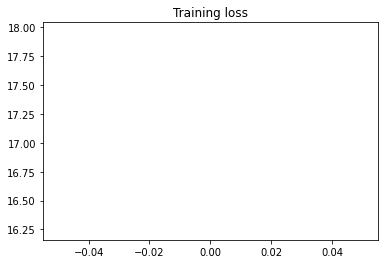

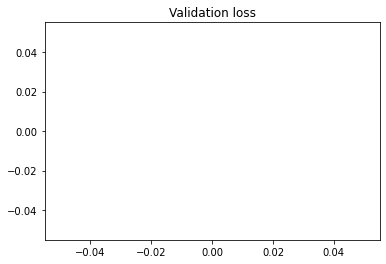

Epoch: 1 / 11, Step: 0/3286 Loss: 1.3803
Epoch: 1 / 11, Step: 1000/3286 Loss: 1.7778
Epoch: 1 / 11, Step: 2000/3286 Loss: 0.7975


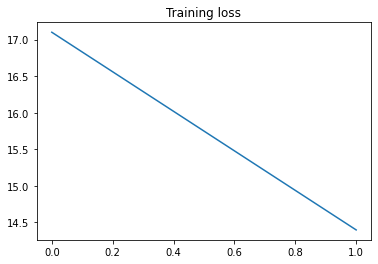

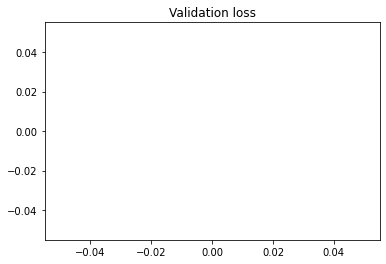

Epoch: 2 / 11, Step: 0/3286 Loss: 1.7308
Epoch: 2 / 11, Step: 1000/3286 Loss: 1.3751
Epoch: 2 / 11, Step: 2000/3286 Loss: 1.8258


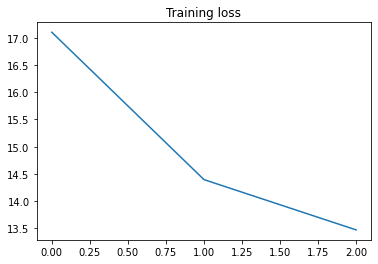

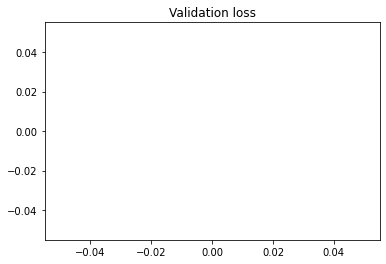

Epoch: 3 / 11, Step: 0/3286 Loss: 1.5694
Epoch: 3 / 11, Step: 1000/3286 Loss: 1.2618
Epoch: 3 / 11, Step: 2000/3286 Loss: 1.3539


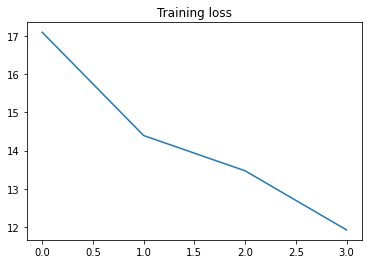

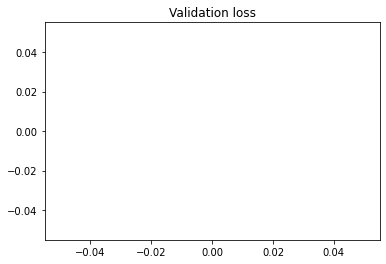

Epoch: 4 / 11, Step: 0/3286 Loss: 1.2389
Epoch: 4 / 11, Step: 1000/3286 Loss: 1.8219
Epoch: 4 / 11, Step: 2000/3286 Loss: 1.1878


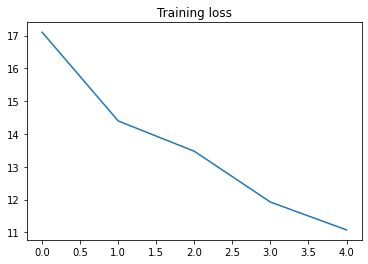

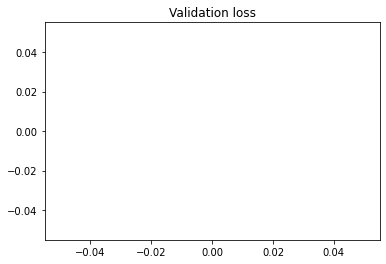

Epoch: 5 / 11, Step: 0/3286 Loss: 0.7566
Epoch: 5 / 11, Step: 1000/3286 Loss: 1.0468
Epoch: 5 / 11, Step: 2000/3286 Loss: 0.9680


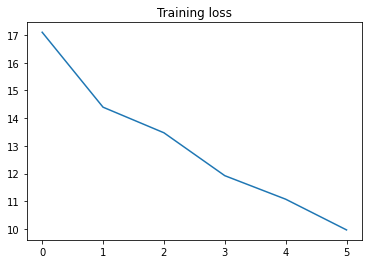

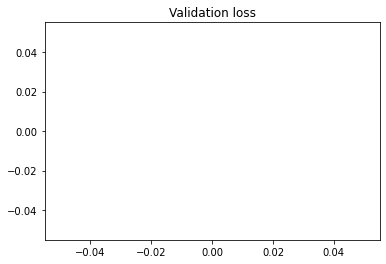

Epoch: 6 / 11, Step: 0/3286 Loss: 0.4786
Epoch: 6 / 11, Step: 1000/3286 Loss: 0.7183
Epoch: 6 / 11, Step: 2000/3286 Loss: 1.2393


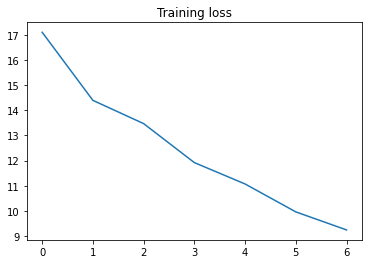

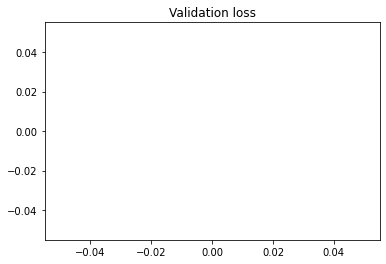

Epoch: 7 / 11, Step: 0/3286 Loss: 0.4945
Epoch: 7 / 11, Step: 1000/3286 Loss: 0.7137
Epoch: 7 / 11, Step: 2000/3286 Loss: 0.7531


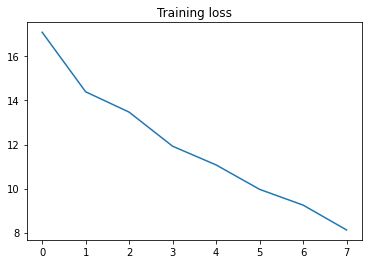

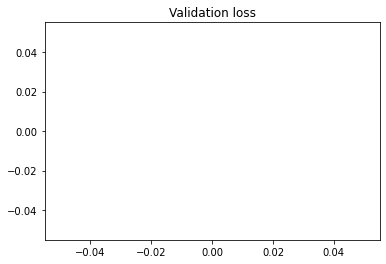

Epoch: 8 / 11, Step: 0/3286 Loss: 0.2453
Epoch: 8 / 11, Step: 1000/3286 Loss: 0.9135
Epoch: 8 / 11, Step: 2000/3286 Loss: 1.6228


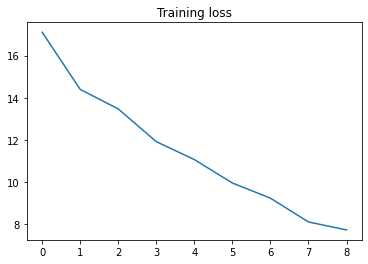

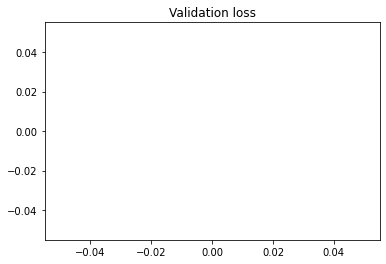

Epoch: 9 / 11, Step: 0/3286 Loss: 0.6448
Epoch: 9 / 11, Step: 1000/3286 Loss: 1.1399
Epoch: 9 / 11, Step: 2000/3286 Loss: 0.4260


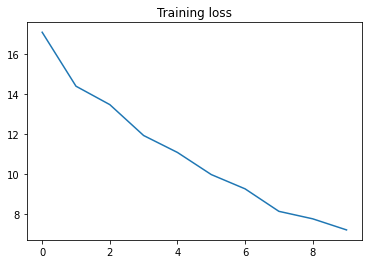

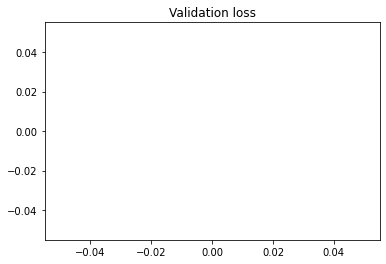

Epoch: 10 / 11, Step: 0/3286 Loss: 0.9862
Epoch: 10 / 11, Step: 1000/3286 Loss: 0.6916
Epoch: 10 / 11, Step: 2000/3286 Loss: 0.5518


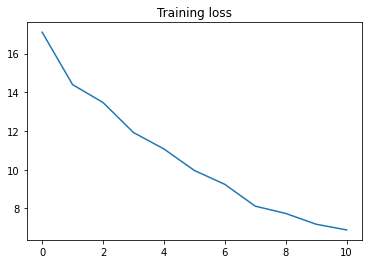

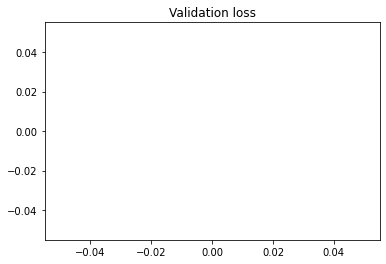

FOLD 1
--------------------------------
Epoch: 0 / 11, Step: 0/3286 Loss: 2.0880
Epoch: 0 / 11, Step: 1000/3286 Loss: 1.6067
Epoch: 0 / 11, Step: 2000/3286 Loss: 1.1825


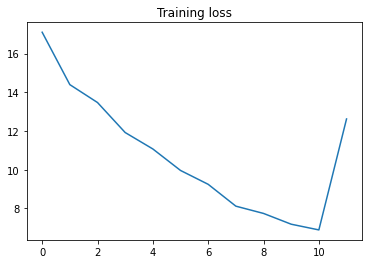

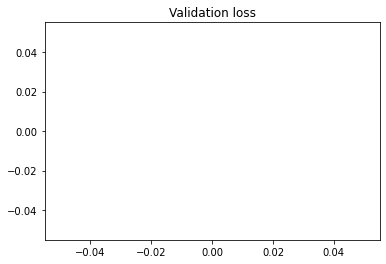

Epoch: 1 / 11, Step: 0/3286 Loss: 0.9243
Epoch: 1 / 11, Step: 1000/3286 Loss: 0.9034
Epoch: 1 / 11, Step: 2000/3286 Loss: 0.8071


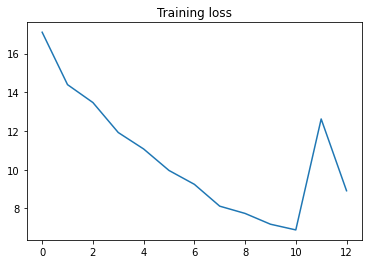

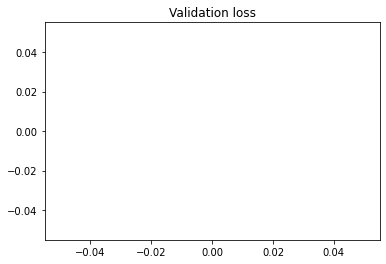

Epoch: 2 / 11, Step: 0/3286 Loss: 0.5267
Epoch: 2 / 11, Step: 1000/3286 Loss: 1.0144
Epoch: 2 / 11, Step: 2000/3286 Loss: 0.5014


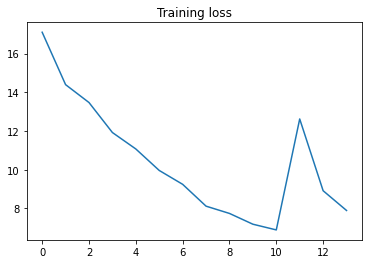

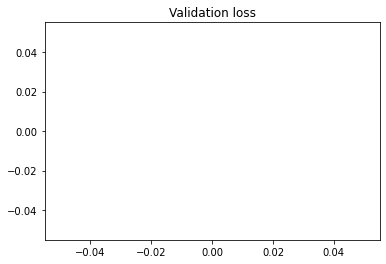

Epoch: 3 / 11, Step: 0/3286 Loss: 0.9262
Epoch: 3 / 11, Step: 1000/3286 Loss: 0.5761
Epoch: 3 / 11, Step: 2000/3286 Loss: 0.6289


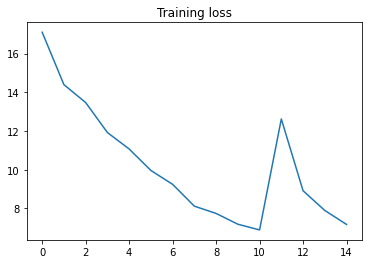

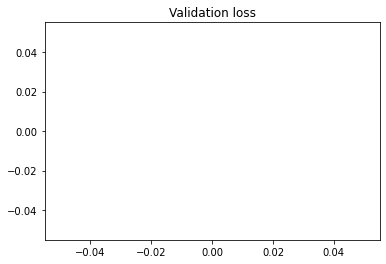

Epoch: 4 / 11, Step: 0/3286 Loss: 0.3717
Epoch: 4 / 11, Step: 1000/3286 Loss: 1.5587
Epoch: 4 / 11, Step: 2000/3286 Loss: 1.0253


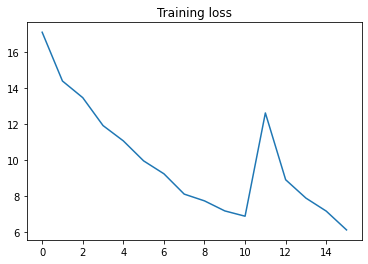

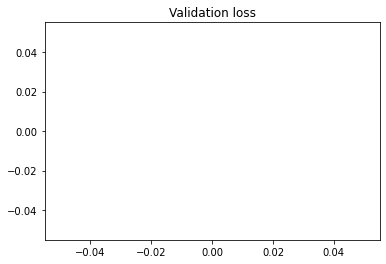

Epoch: 5 / 11, Step: 0/3286 Loss: 0.5380
Epoch: 5 / 11, Step: 1000/3286 Loss: 0.6936
Epoch: 5 / 11, Step: 2000/3286 Loss: 0.3913


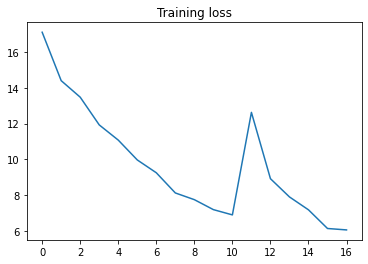

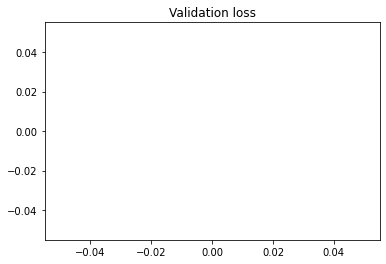

Epoch: 6 / 11, Step: 0/3286 Loss: 1.3228
Epoch: 6 / 11, Step: 1000/3286 Loss: 0.5426
Epoch: 6 / 11, Step: 2000/3286 Loss: 1.3775


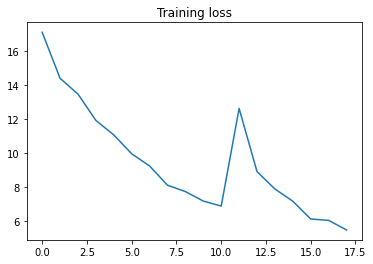

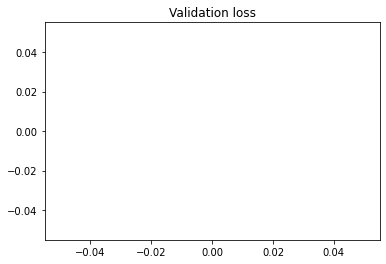

Epoch: 7 / 11, Step: 0/3286 Loss: 0.4672
Epoch: 7 / 11, Step: 1000/3286 Loss: 0.2571
Epoch: 7 / 11, Step: 2000/3286 Loss: 0.9306


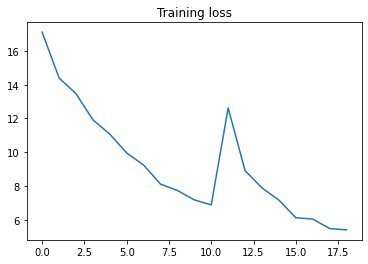

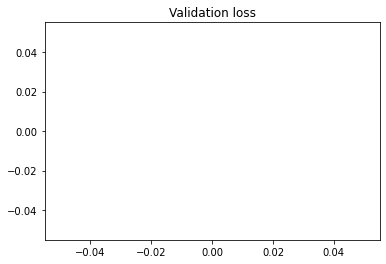

Epoch: 8 / 11, Step: 0/3286 Loss: 0.1050
Epoch: 8 / 11, Step: 1000/3286 Loss: 0.9049
Epoch: 8 / 11, Step: 2000/3286 Loss: 0.4648


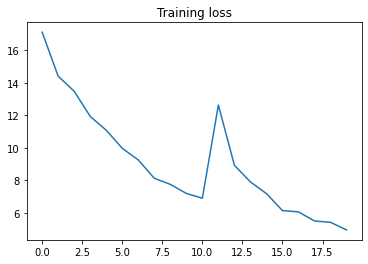

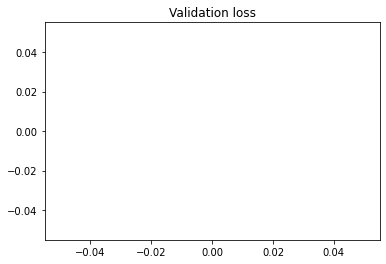

Epoch: 9 / 11, Step: 0/3286 Loss: 0.2800
Epoch: 9 / 11, Step: 1000/3286 Loss: 0.5765
Epoch: 9 / 11, Step: 2000/3286 Loss: 0.2968


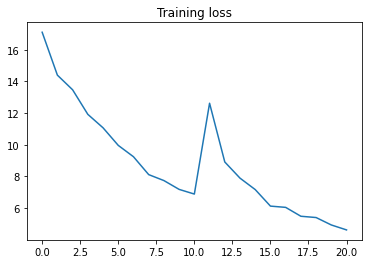

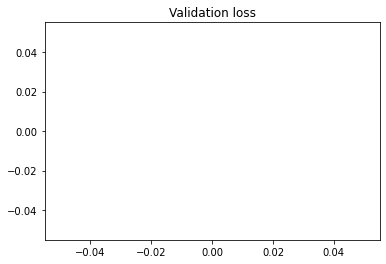

Epoch: 10 / 11, Step: 0/3286 Loss: 0.2648
Epoch: 10 / 11, Step: 1000/3286 Loss: 0.3468
Epoch: 10 / 11, Step: 2000/3286 Loss: 0.8294


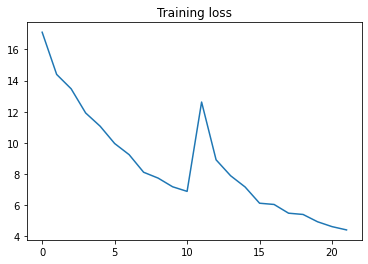

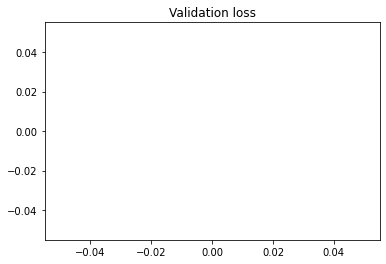

FOLD 2
--------------------------------
Epoch: 0 / 11, Step: 0/3286 Loss: 2.0834
Epoch: 0 / 11, Step: 1000/3286 Loss: 0.9812
Epoch: 0 / 11, Step: 2000/3286 Loss: 1.1057


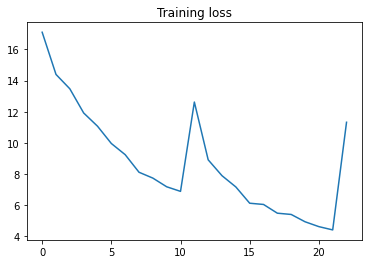

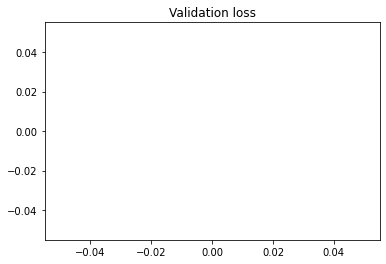

Epoch: 1 / 11, Step: 0/3286 Loss: 0.3192
Epoch: 1 / 11, Step: 1000/3286 Loss: 0.5061
Epoch: 1 / 11, Step: 2000/3286 Loss: 0.7799


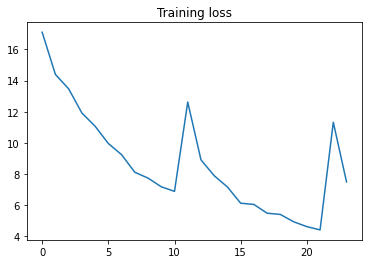

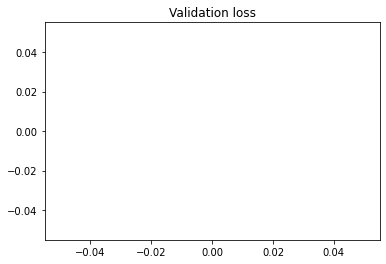

Epoch: 2 / 11, Step: 0/3286 Loss: 1.0730
Epoch: 2 / 11, Step: 1000/3286 Loss: 0.5957
Epoch: 2 / 11, Step: 2000/3286 Loss: 1.0906


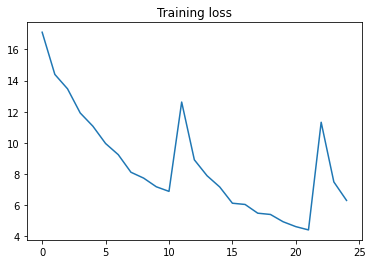

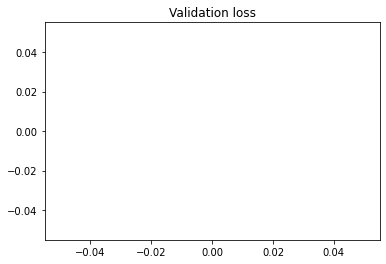

Epoch: 3 / 11, Step: 0/3286 Loss: 0.6507
Epoch: 3 / 11, Step: 1000/3286 Loss: 0.1173
Epoch: 3 / 11, Step: 2000/3286 Loss: 0.2839


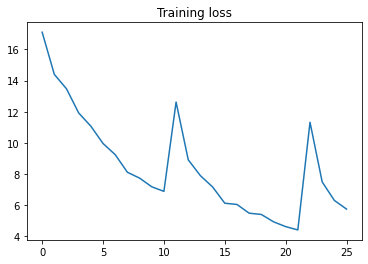

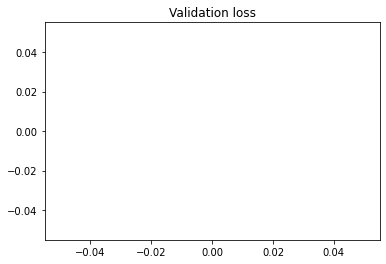

Epoch: 4 / 11, Step: 0/3286 Loss: 0.4813
Epoch: 4 / 11, Step: 1000/3286 Loss: 0.4399
Epoch: 4 / 11, Step: 2000/3286 Loss: 0.3470


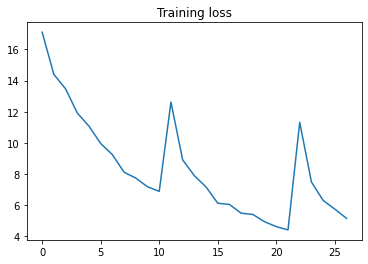

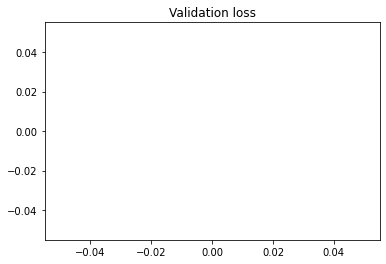

Epoch: 5 / 11, Step: 0/3286 Loss: 0.3499
Epoch: 5 / 11, Step: 1000/3286 Loss: 0.5164
Epoch: 5 / 11, Step: 2000/3286 Loss: 0.1039


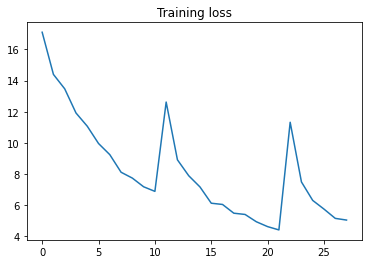

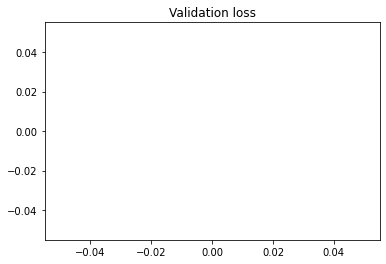

Epoch: 6 / 11, Step: 0/3286 Loss: 0.6713
Epoch: 6 / 11, Step: 1000/3286 Loss: 0.2973
Epoch: 6 / 11, Step: 2000/3286 Loss: 0.4348


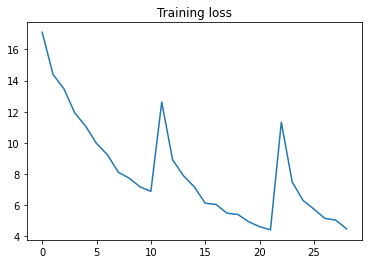

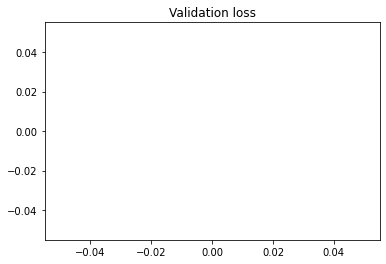

Epoch: 7 / 11, Step: 0/3286 Loss: 0.3147
Epoch: 7 / 11, Step: 1000/3286 Loss: 0.2382
Epoch: 7 / 11, Step: 2000/3286 Loss: 0.4700


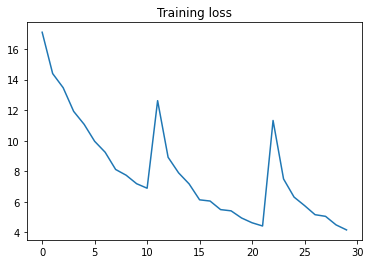

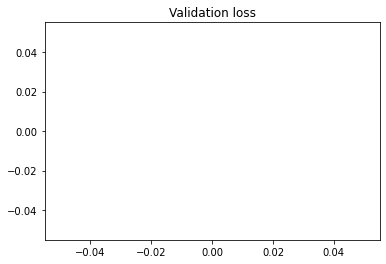

Epoch: 8 / 11, Step: 0/3286 Loss: 0.5617
Epoch: 8 / 11, Step: 1000/3286 Loss: 0.1185
Epoch: 8 / 11, Step: 2000/3286 Loss: 0.2770


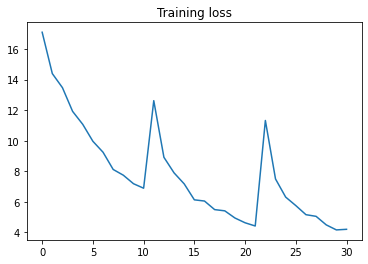

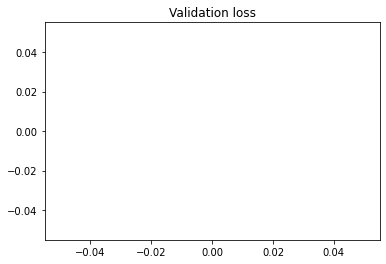

Epoch: 9 / 11, Step: 0/3286 Loss: 0.1325
Epoch: 9 / 11, Step: 1000/3286 Loss: 0.1774
Epoch: 9 / 11, Step: 2000/3286 Loss: 0.3594


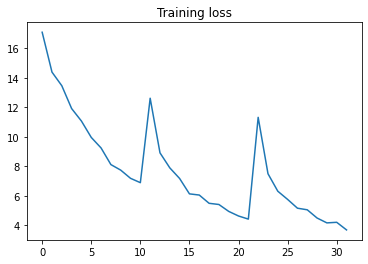

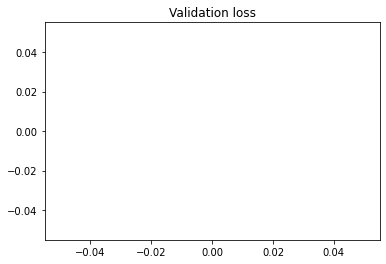

Epoch: 10 / 11, Step: 0/3286 Loss: 0.3787
Epoch: 10 / 11, Step: 1000/3286 Loss: 0.3143
Epoch: 10 / 11, Step: 2000/3286 Loss: 0.0581


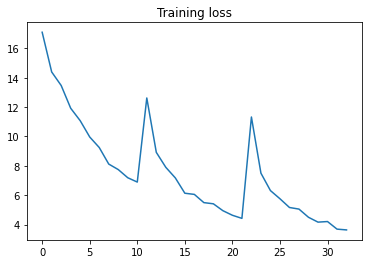

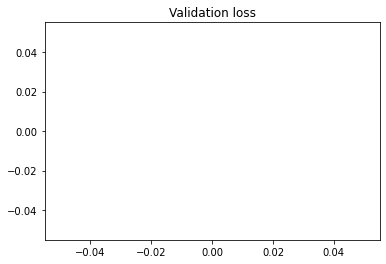

FOLD 3
--------------------------------
Epoch: 0 / 11, Step: 0/3286 Loss: 2.0521
Epoch: 0 / 11, Step: 1000/3286 Loss: 1.1515
Epoch: 0 / 11, Step: 2000/3286 Loss: 0.8888


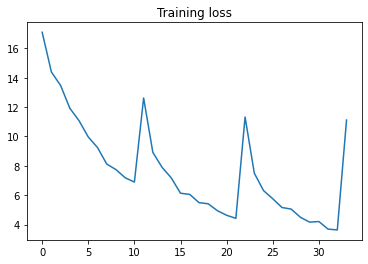

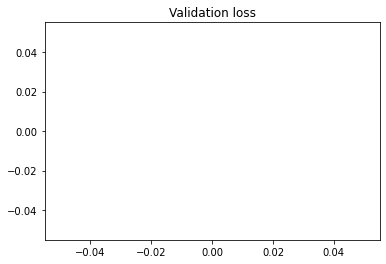

Epoch: 1 / 11, Step: 0/3286 Loss: 0.9922
Epoch: 1 / 11, Step: 1000/3286 Loss: 0.4876
Epoch: 1 / 11, Step: 2000/3286 Loss: 0.3113


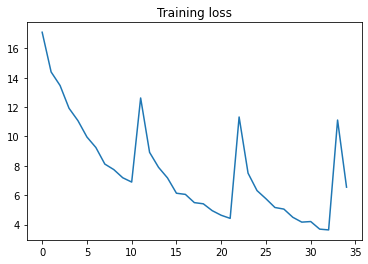

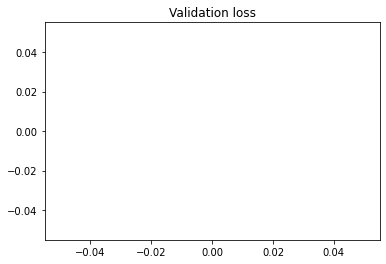

Epoch: 2 / 11, Step: 0/3286 Loss: 0.6763
Epoch: 2 / 11, Step: 1000/3286 Loss: 0.4165
Epoch: 2 / 11, Step: 2000/3286 Loss: 0.3241


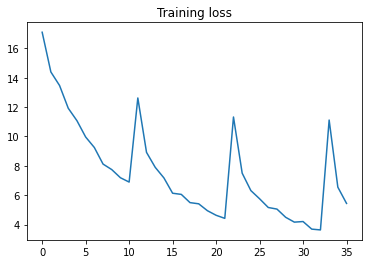

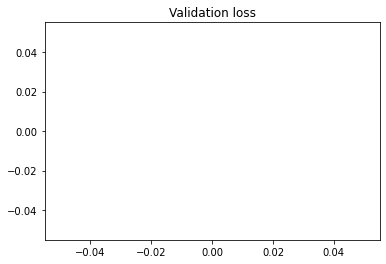

Epoch: 3 / 11, Step: 0/3286 Loss: 0.6180
Epoch: 3 / 11, Step: 1000/3286 Loss: 0.7233
Epoch: 3 / 11, Step: 2000/3286 Loss: 0.3657


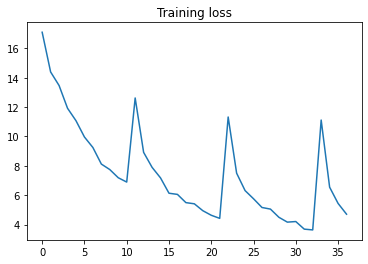

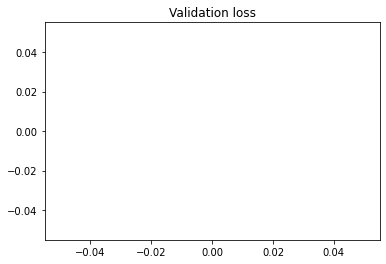

Epoch: 4 / 11, Step: 0/3286 Loss: 0.2490
Epoch: 4 / 11, Step: 1000/3286 Loss: 0.2081
Epoch: 4 / 11, Step: 2000/3286 Loss: 0.4056


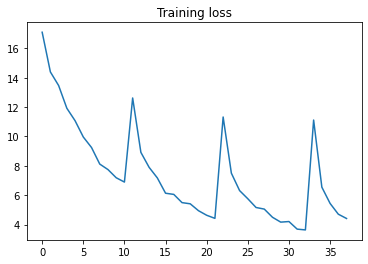

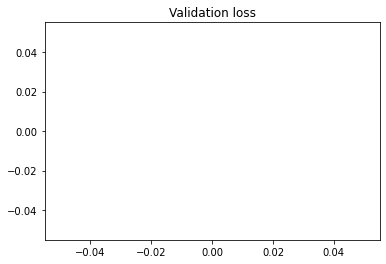

Epoch: 5 / 11, Step: 0/3286 Loss: 0.5997
Epoch: 5 / 11, Step: 1000/3286 Loss: 0.4419
Epoch: 5 / 11, Step: 2000/3286 Loss: 1.1012


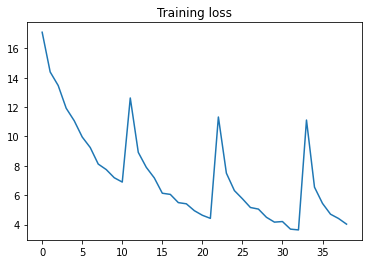

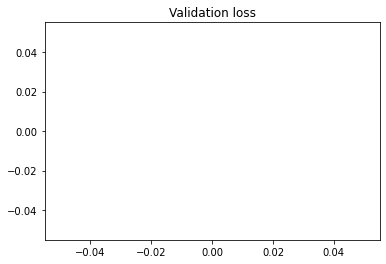

Epoch: 6 / 11, Step: 0/3286 Loss: 0.1900
Epoch: 6 / 11, Step: 1000/3286 Loss: 0.6427
Epoch: 6 / 11, Step: 2000/3286 Loss: 0.4359


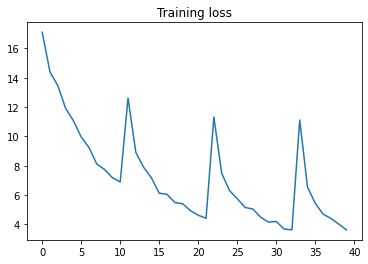

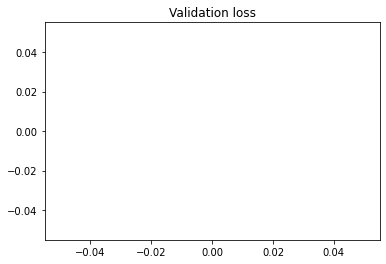

Epoch: 7 / 11, Step: 0/3286 Loss: 0.4238
Epoch: 7 / 11, Step: 1000/3286 Loss: 0.5454
Epoch: 7 / 11, Step: 2000/3286 Loss: 0.6022


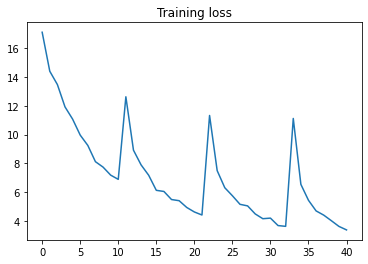

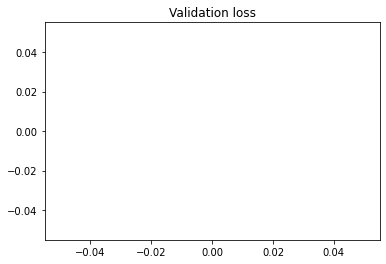

Epoch: 8 / 11, Step: 0/3286 Loss: 0.0904
Epoch: 8 / 11, Step: 1000/3286 Loss: 0.0673
Epoch: 8 / 11, Step: 2000/3286 Loss: 0.1763


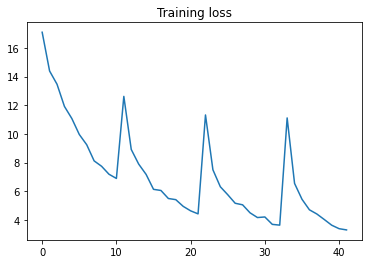

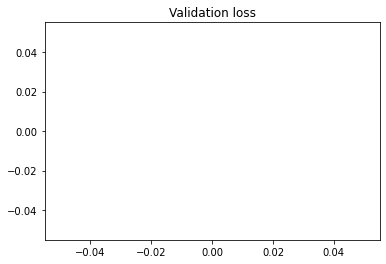

Epoch: 9 / 11, Step: 0/3286 Loss: 0.1387
Epoch: 9 / 11, Step: 1000/3286 Loss: 0.2536
Epoch: 9 / 11, Step: 2000/3286 Loss: 0.2026


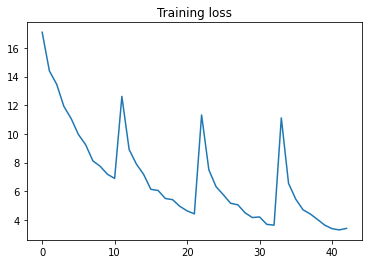

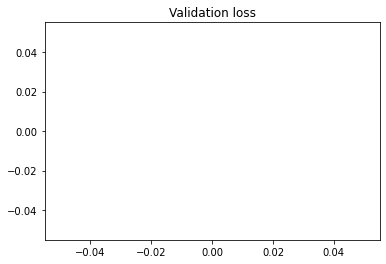

Epoch: 10 / 11, Step: 0/3286 Loss: 0.5332
Epoch: 10 / 11, Step: 1000/3286 Loss: 0.6676
Epoch: 10 / 11, Step: 2000/3286 Loss: 0.4353


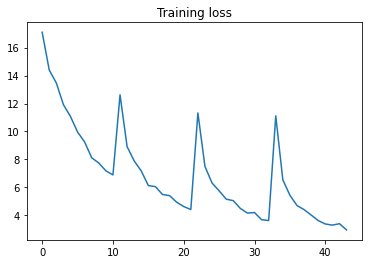

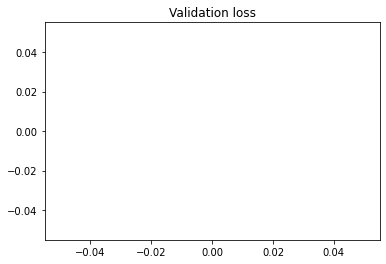

FOLD 4
--------------------------------
Epoch: 0 / 11, Step: 0/3286 Loss: 2.0520
Epoch: 0 / 11, Step: 1000/3286 Loss: 1.3251
Epoch: 0 / 11, Step: 2000/3286 Loss: 0.5673


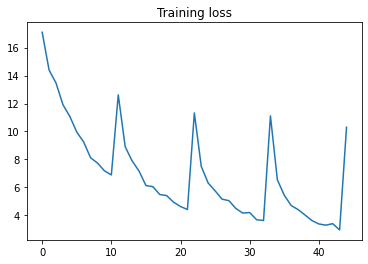

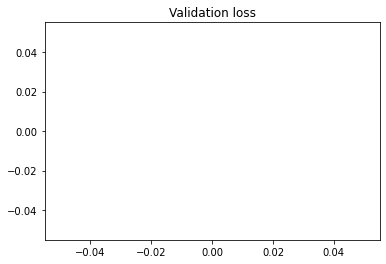

Epoch: 1 / 11, Step: 0/3286 Loss: 0.5018
Epoch: 1 / 11, Step: 1000/3286 Loss: 1.2028
Epoch: 1 / 11, Step: 2000/3286 Loss: 0.7699


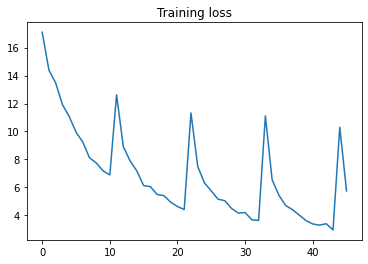

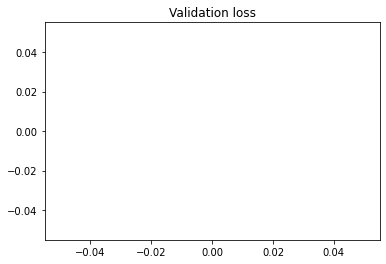

Epoch: 2 / 11, Step: 0/3286 Loss: 0.3431
Epoch: 2 / 11, Step: 1000/3286 Loss: 0.3117
Epoch: 2 / 11, Step: 2000/3286 Loss: 0.7140


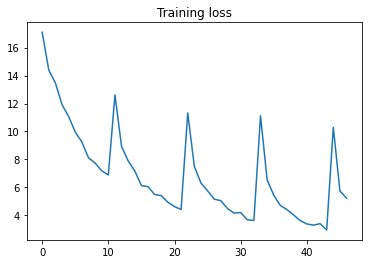

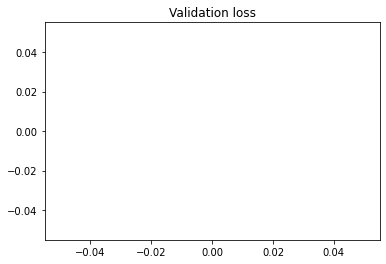

Epoch: 3 / 11, Step: 0/3286 Loss: 0.2820
Epoch: 3 / 11, Step: 1000/3286 Loss: 0.5884
Epoch: 3 / 11, Step: 2000/3286 Loss: 0.5492


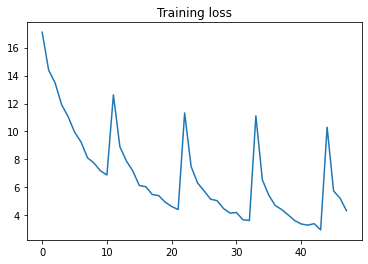

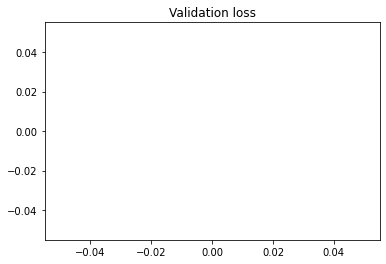

Epoch: 4 / 11, Step: 0/3286 Loss: 0.1239
Epoch: 4 / 11, Step: 1000/3286 Loss: 0.5416
Epoch: 4 / 11, Step: 2000/3286 Loss: 0.3199


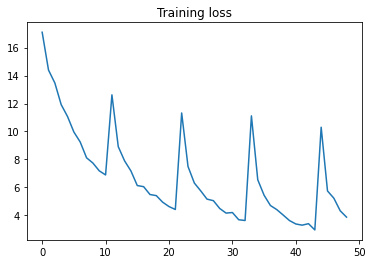

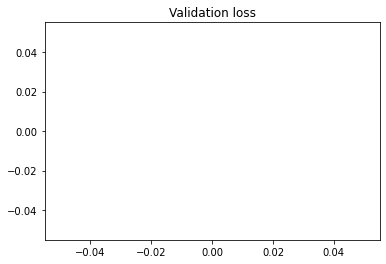

Epoch: 5 / 11, Step: 0/3286 Loss: 0.6151
Epoch: 5 / 11, Step: 1000/3286 Loss: 0.1510
Epoch: 5 / 11, Step: 2000/3286 Loss: 0.1941


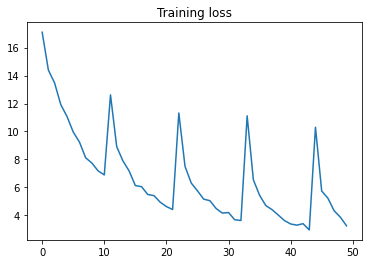

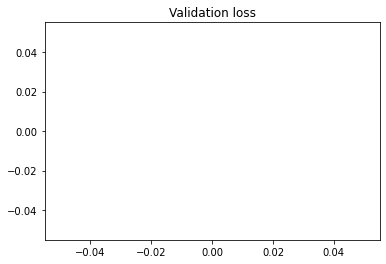

Epoch: 6 / 11, Step: 0/3286 Loss: 0.1285
Epoch: 6 / 11, Step: 1000/3286 Loss: 0.0483
Epoch: 6 / 11, Step: 2000/3286 Loss: 0.5509


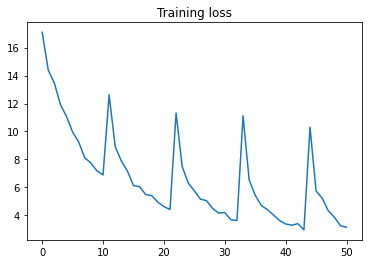

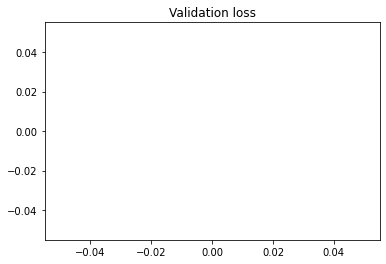

Epoch: 7 / 11, Step: 0/3286 Loss: 0.2779
Epoch: 7 / 11, Step: 1000/3286 Loss: 0.0626
Epoch: 7 / 11, Step: 2000/3286 Loss: 0.1203


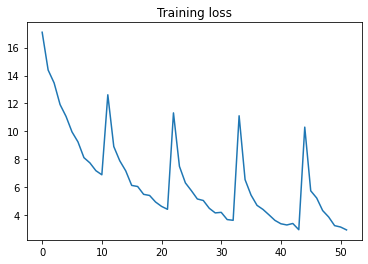

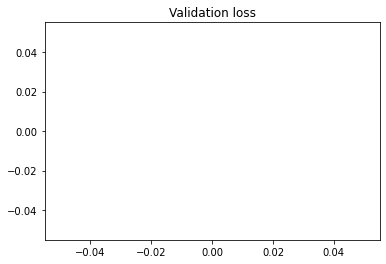

Epoch: 8 / 11, Step: 0/3286 Loss: 0.0402
Epoch: 8 / 11, Step: 1000/3286 Loss: 0.0351
Epoch: 8 / 11, Step: 2000/3286 Loss: 0.3237


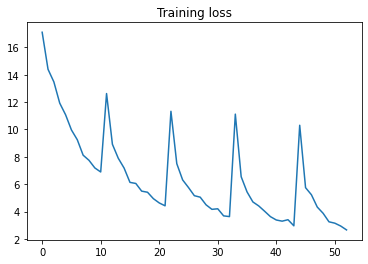

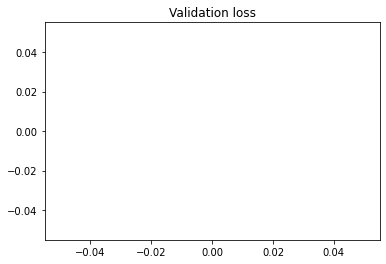

Epoch: 9 / 11, Step: 0/3286 Loss: 0.2998
Epoch: 9 / 11, Step: 1000/3286 Loss: 0.6883
Epoch: 9 / 11, Step: 2000/3286 Loss: 0.4064


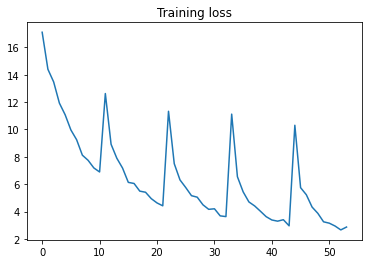

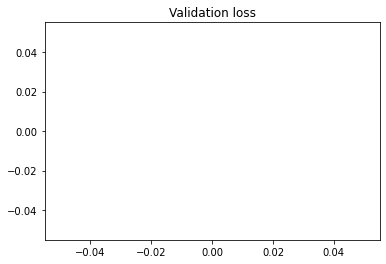

Epoch: 10 / 11, Step: 0/3286 Loss: 0.2082
Epoch: 10 / 11, Step: 1000/3286 Loss: 0.0355
Epoch: 10 / 11, Step: 2000/3286 Loss: 0.2365


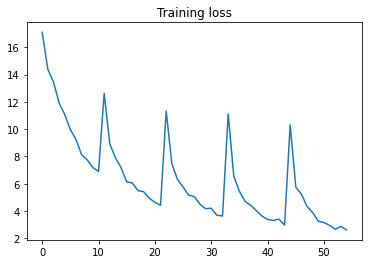

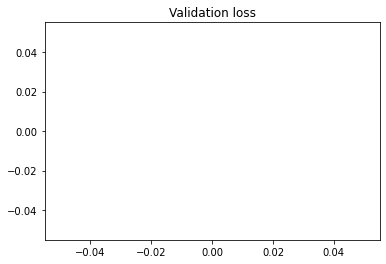

In [9]:
loss_train_epoch = []
loss_val_epoch = []
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=10, sampler=test_subsampler)
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()
    optimization = optim.SGD(model.parameters(), lr=0.01)
    for epoch in range(11):
        train_loss = 0.0
        model.train()
        for i, (images, labels) in enumerate(trainloader):
            images_x, labels_x = images.to(device), labels.to(device)
            output = model(images_x)
            loss_value = loss(output, labels_x)
            optimization.zero_grad()
            loss_value.backward()
            optimization.step()
            train_loss += loss_value.item()*images.size(0)
            
            if i % 100 == 0:
                print("Epoch: {} / {}, Step: {}/{} Loss: {:.4f}".format(epoch, 11, i*len(images), len(trainloader.dataset), loss_value.item()))
#         loss_train_epoch.append(train_loss/ len(trainloader))
#         plt.title('Training loss')
#         plt.plot(loss_train_epoch)
#         plt.show()
#         plt.title('Validation loss')
#         plt.plot(loss_val_epoch)
#         plt.show()
#         model.eval()
#         val_loss = 0.0
#         for i, (images, labels) in enumerate(testloader):
#             images_x, labels_x = images.to(device), labels.to(device)
#             output = model(images_x)
#             loss_value = loss(output, labels_x)
#             val_loss += loss_value.item()*images.size(0)
#         loss_val_epoch.append(val_loss/len(testloader))

In [10]:
model.eval()
all_labels = []
preds = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(testloader):
        test_output = model(images.to(device))
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        all_labels.extend(labels)
        preds.extend(pred_y)
        accuracy = (pred_y == labels.to(device)).sum().item() / float(labels.size(0))
print("Test set accuracy: ", accuracy)

Test set accuracy:  0.7142857142857143


/tmp/ipykernel_1193736/1550805491.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_labels = torch.tensor(all_labels, device = 'cpu')
/tmp/ipykernel_1193736/1550805491.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds = torch.tensor(preds, device = 'cpu')


<AxesSubplot:>

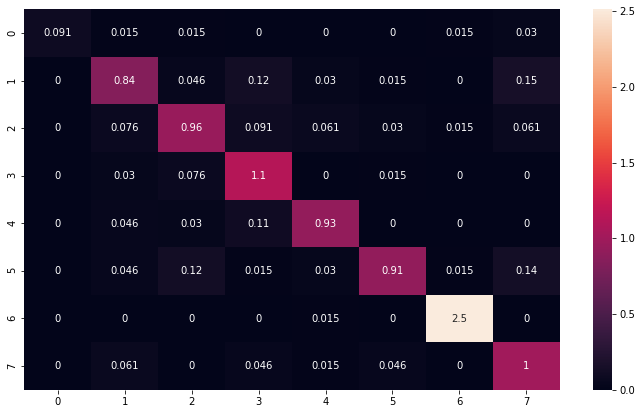

In [12]:
classes =('0', '1', '2', '3', '4', '5', '6', '7')
all_labels = torch.tensor(all_labels, device = 'cpu')
preds = torch.tensor(preds, device = 'cpu')
cf_matrix = confusion_matrix(all_labels, preds)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)